<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.467661  60.084483  58.762212  ...  215.046503  216.732927 -1.686423
      1.0    75.427604  66.787560  34.802035  ...  187.721409  188.051200 -0.329791
      2.0    97.490622  35.018135  21.338932  ...  163.174195  165.225789 -2.051594
      3.0    49.162916  23.304728  31.320070  ...  114.528082  113.489072  1.039010
      4.0    70.570376  70.626809  74.341997  ...  217.829211  225.262074 -7.432863
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.991258  31.899005  72.465251  ...  153.252243  149.497143  3.755100
      16.0   92.759438  26.262796  77.372666  ...  204.494755  205.689696 -1.194940
      17.0   45.690994  93.770471  21.377683  ...  169.835600  171.427547 -1.591947
      18.0   97.475528  81.606370  32.609906  ...  222.881556  221.429459  1.452096
      19.0   80.227537  56.238788  59.662487  ...  208.952696  205.708928  3.243768

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.467661  60.084483  58.762212  ...  215.046503  216.732927 -1.686423
      1.0    75.427604  66.787560  34.802035  ...  187.721409  188.051200 -0.329791
      2.0    97.490622  35.018135  21.338932  ...  163.174195  165.225789 -2.051594
      3.0    49.162916  23.304728  31.320070  ...  114.528082  113.489072  1.039010
      4.0    70.570376  70.626809  74.341997  ...  217.829211  225.262074 -7.432863
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.991258  31.899005  72.465251  ...  153.252243  149.497143  3.755100
      16.0   92.759438  26.262796  77.372666  ...  204.494755  205.689696 -1.194940
      17.0   45.690994  93.770471  21.377683  ...  169.835600  171.427547 -1.591947
      18.0   97.475528  81.606370  32.609906  ...  222.881556  221.429459  1.452096
      19.0   80.227537  56.238788  59.662487  ...  208.952696  205.708928  3.243768

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.467661  60.084483  58.762212  ...  215.046503  216.732927 -1.686423
      1.0    75.427604  66.787560  34.802035  ...  187.721409  188.051200 -0.329791
      2.0    97.490622  35.018135  21.338932  ...  163.174195  165.225789 -2.051594
      3.0    49.162916  23.304728  31.320070  ...  114.528082  113.489072  1.039010
      4.0    70.570376  70.626809  74.341997  ...  217.829211  225.262074 -7.432863
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.991258  31.899005  72.465251  ...  153.252243  149.497143  3.755100
      16.0   92.759438  26.262796  77.372666  ...  204.494755  205.689696 -1.194940
      17.0   45.690994  93.770471  21.377683  ...  169.835600  171.427547 -1.591947
      18.0   97.475528  81.606370  32.609906  ...  222.881556  221.429459  1.452096
      19.0   80.227537  56.238788  59.662487  ...  208.952696  205.708928  3.243768

[20000 rows x 7 columns]

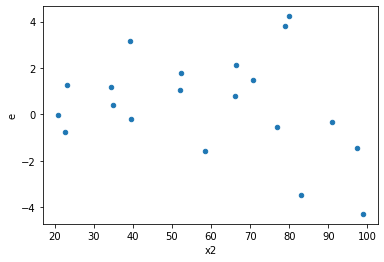

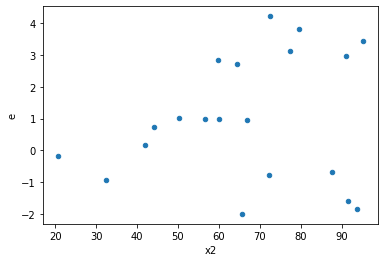

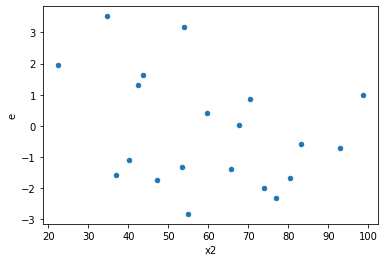

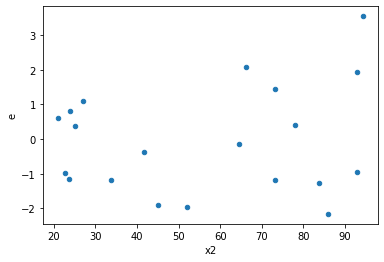

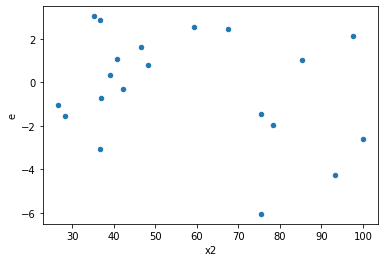

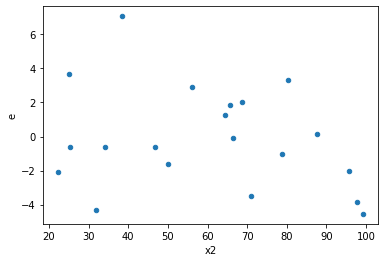

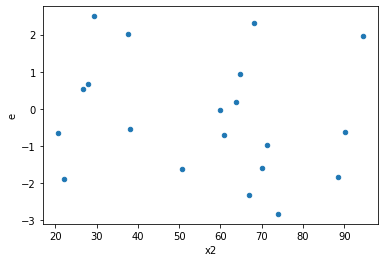

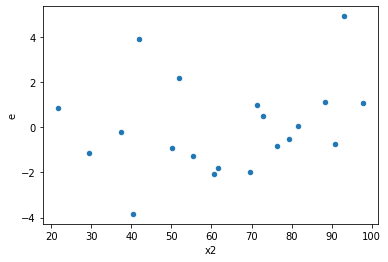

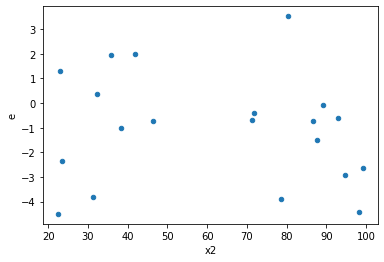

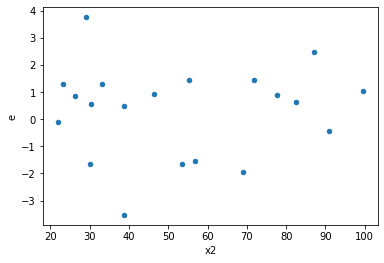

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,3.690442158342624,88.28844605595144,0.7380884316685248,17.657689211190288,23.92354148035252,0.0033540888598779794,0.998322955570061,0.0016770444299389897,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,29.215298148056725,60.36301279088758,5.843059629611345,12.072602558177516,2.0661439936358366,0.44472924137142034,0.7776353793142898,0.22236462068571017,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,3.616746408167876,12.911958689186164,0.7233492816335751,2.582391737837233,3.5700481128636654,0.1888011190020784,0.9055994404989608,0.0944005595010392,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,20.903740390643293,20.97668018016921,4.180748078128659,4.195336036033842,1.0034893176131563,0.9970433380787476,0.5014783309606262,0.4985216690393738,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,5.687161928564349,34.5652220932751,1.1374323857128696,6.913044418655021,6.077762955837035,0.06952934966534574,0.9652353251673271,0.03476467483267287,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,13.824474483655871,44.35751062323141,2.764894896731174,8.871502124646282,3.208621830484301,0.22652522963689137,0.8867373851815543,0.11326261481844568,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,13.785708937399635,25.191859618620263,2.757141787479927,5.0383719237240525,1.827389489580515,0.524204683940158,0.737897658029921,0.262102341970079,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,11.860178421099643,37.28994386730117,2.3720356842199286,7.457988773460234,3.1441300917498127,0.23433112601140071,0.8828344369942996,0.11716556300570036,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,1.81820790397347,39.74717318857911,0.363641580794694,7.9494346377158225,21.860631615183582,0.004146141194929287,0.9979269294025354,0.0020730705974646435,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,3.690442158342624,88.28844605595144,0.7380884316685248,17.657689211190288,23.92354148035252,0.0033540888598779794,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,29.215298148056725,60.36301279088758,5.843059629611345,12.072602558177516,2.0661439936358366,0.44472924137142034,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,3.616746408167876,12.911958689186164,0.7233492816335751,2.582391737837233,3.5700481128636654,0.1888011190020784,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,20.903740390643293,20.97668018016921,4.180748078128659,4.195336036033842,1.0034893176131563,0.9970433380787476,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,5.687161928564349,34.5652220932751,1.1374323857128696,6.913044418655021,6.077762955837035,0.06952934966534574,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,13.824474483655871,44.35751062323141,2.764894896731174,8.871502124646282,3.208621830484301,0.22652522963689137,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,13.785708937399635,25.191859618620263,2.757141787479927,5.0383719237240525,1.827389489580515,0.524204683940158,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,17.92711744475038,17.27327639505633,3.585423488950076,3.4546552790112663,0.963527820258381,0.9684718424436152,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,15.658589655007765,9.752329846971048,3.131717931001553,1.9504659693942095,0.6228102314343591,0.6159861370178477,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      890
Reject005=0 : Heteroscedasticity    110
Name: Result_test, dtype: int64